In [55]:
#SAI KIRAN REDDY K
#PRO INDIA ASSESMENT 3
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#load the datasets 
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

# info on data sets 
books.info
book_tags.info
ratings.info

<bound method DataFrame.info of         user_id  book_id  rating
0             8     2584       5
1             4       87       5
2             4      495       4
3             9      344       4
4             9      372       4
...         ...      ...     ...
233378    36947     6939       5
233379    22352      617       2
233380    42785     1613       4
233381    10622      610       5
233382    35336      317       5

[233383 rows x 3 columns]>

In [57]:
# Check for missing values in key columns
print(books['original_title'].isna().sum())
print(book_tags['tag_id'].isna().sum())
print(ratings['user_id'].isna().sum())

36
0
0


In [58]:
#Number of books without an original title
books_wot = books['original_title'].isna().sum()
print(f"Number of books without an original title: {books_wot}")

Number of books without an original title: 36


In [64]:
#Unique books count after filtering null original_title and corresponding records in other datasets
filtered_books_df = books.dropna(subset=['original_title']) #drop null value
unique_books_count = filtered_books_df['book_id'].nunique()
print(f"Unique books count after filtering null original_title and corresponding records in other datasets: {unique_books_count}")

Unique books count after filtering null original_title and corresponding records in other datasets: 363


In [65]:
filtered_book_tags_df = book_tags[book_tags['goodreads_book_id'].isin(filtered_books_df)]
filtered_ratings_df = ratings[ratings['book_id'].isin(filtered_books_df)]
#with updated data all ans were  0 , proceing with normal data 

In [66]:
unique_users_count = ratings_df['user_id'].nunique()
print(f'Unique users in the dataset ;{unique_users_count}')

Unique users in the dataset ;40836


In [68]:
unique_tags_count = book_tags['tag_id'].nunique()
print(f'Unique tags in the dataset :{unique_tags_count}')

Unique tags in the dataset :3651


In [69]:
# Most frequently used tag_id
most_frequent_tag_id = book_tags.groupby('tag_id')['count'].sum().idxmax()
print(f"Most frequently used tag_id :{most_frequent_tag_id}")

Most frequently used tag_id :30574


In [52]:
#Book with the most number of tag counts
merged_df = pd.merge(books, book_tags, how='left', on='goodreads_book_id')
most_tagged_book = merged_df.groupby('title')['count'].sum().idxmax()
print(f'Book with the most number of tag counts:{most_tagged_book}')

Book with the most number of tag counts:'Tis (Frank McCourt, #2)


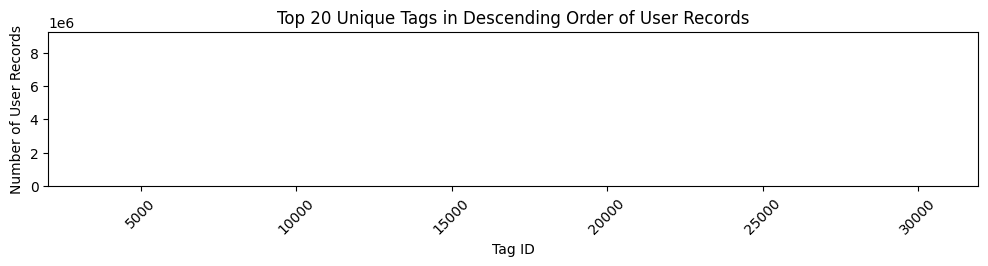

In [71]:
# Assuming book_tags_df is already loaded and correct
top_tags = book_tags.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(20)
top_tags_ids = top_tags.index.tolist()
top_tags_counts = top_tags.values.tolist()

# Plotting the bar chart
plt.figure(figsize=(12, 2))
plt.bar(top_tags_ids, top_tags_counts, color='skyblue')
plt.title('Top 20 Unique Tags in Descending Order of User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45)
plt.show()